importando as bibliotecas necessarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import magMaps as map
import lensLibrary as llib

In [2]:
num_pontos = 50000
cart_pontos = 200

r1 = np.array([0.0005])
r2 = np.array([-0.5, 0.5])
r3 = np.array([-1.25, 0.0005, 1.25])

n = np.array([1, 2, 3])

**PLOTANDO AS DISTRIBUIÇÕES**

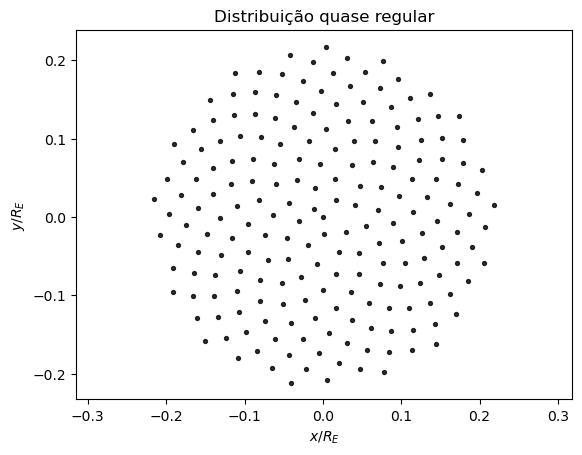

In [3]:
Xp_arq_esp, Yp_arq_esp = map.arquimedes(200)

plt.scatter(Xp_arq_esp, Yp_arq_esp, s = 8, color='k', alpha=0.8)  # s é o tamanho dos pontos, alpha é a transparência

plt.title('Distribuição quase regular')
plt.xlabel(r'$x/R_{E}$')
plt.ylabel(r'$y/R_{E}$')
plt.axis('equal')
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)

plt.show()

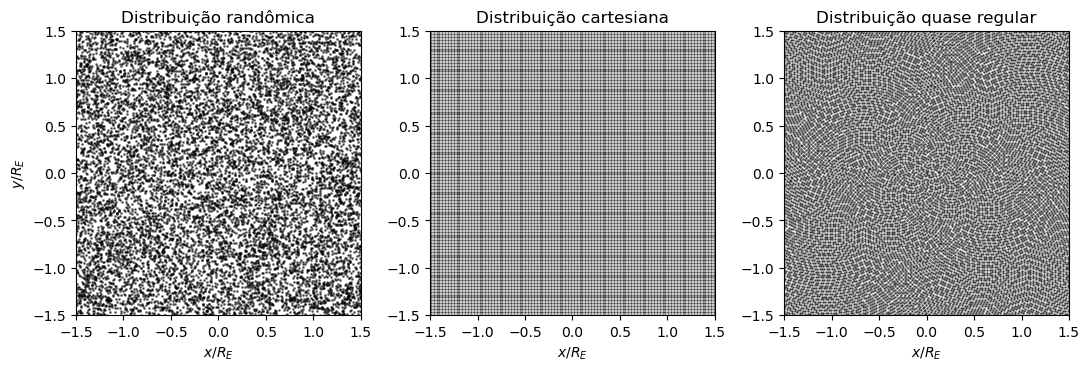

In [4]:
# Dados para os gráficos
Xp_rand = np.random.uniform(-3, 3, num_pontos)
Yp_rand = np.random.uniform(-3, 3, num_pontos)

X = np.linspace(-3, 3, cart_pontos)
Y = np.linspace(-3, 3, cart_pontos)
Xp_cart, Yp_cart = np.meshgrid(X, Y)

Xp_arq, Yp_arq = map.arquimedes(num_pontos)

map.sub_plots(Xp_rand, Yp_rand, Xp_cart, Yp_cart, Xp_arq, Yp_arq)

**Plot dos mapas de magnificações para duas lentes usando as três distribuições**

In [5]:
Zp_rand = map.make_complex(Xp_rand, Yp_rand)
x_rand, y_rand = map.zs_final_position(Zp_rand, n[1], r2)

Zp_cart = map.make_complex(Xp_cart, Yp_cart)
x_cart, y_cart = map.zs_final_position(Zp_cart, n[1], r2)

Zp_arq = map.make_complex(Xp_arq, Yp_arq)
x_arq, y_arq = map.zs_final_position(Zp_arq, n[1], r2)

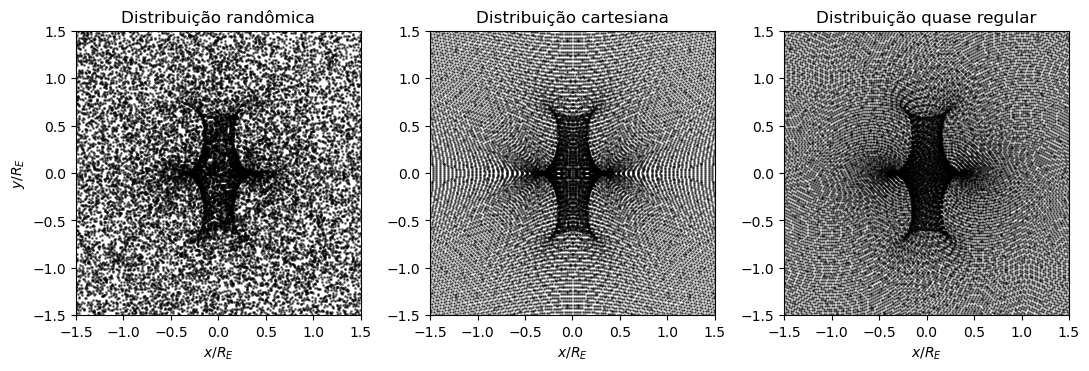

In [6]:
map.sub_plots(x_rand, y_rand, x_cart, y_cart, x_arq, y_arq)

**Agora vamos plotar os graficos de magnitude para cada caminho dado pela fonte, primeiramente vamos fazer o processo para um caminho especifico e depois generalizar para vários caminhos**

In [7]:
res = 100                              # quantidade de pontos
alpha = 0.5                           # inclinacao

mu = 0                                # parametro de impacto
b = mu/math.cos(alpha)                # interseccao com eixo y

xp = np.linspace(-1.5, 1.5, res)
yp = np.tan(alpha)*xp + b

agora podemos plotar o caminho da fonte passando pelas duas lentes usando uma funcao auxiliar

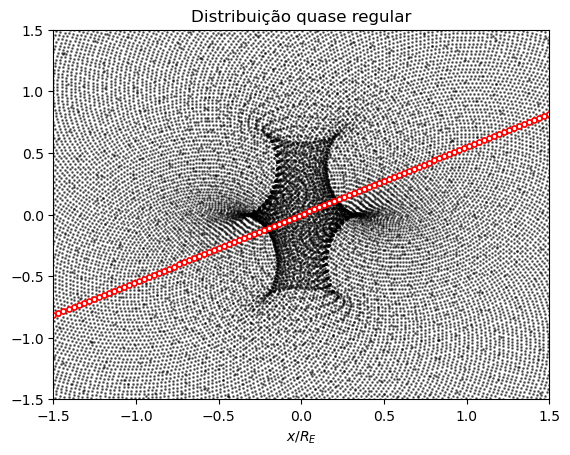

In [8]:
map.caminho(x_arq, y_arq, xp, yp)

para cada ponto vermelho na figura acima, calculamos quantos pontos pretos (fótons) da distribuição estão próximos (menor que delta) do referido ponto, ou seja, para cada ponto calculamos a densidade de fótons dada pela dispersão quase regular

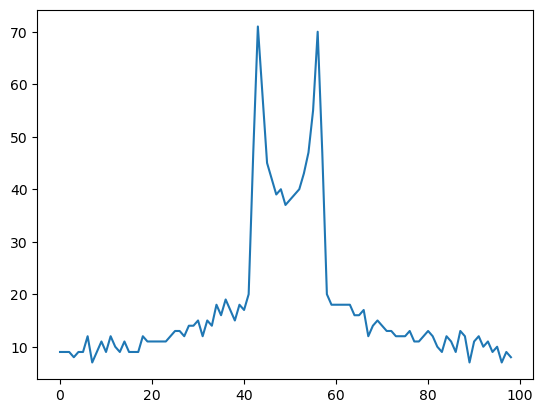

In [9]:
mag = np.zeros(len(xp)-1)  # Inicializa a array mag com zeros
t = range(len(xp)-1)
delt = 0.04

for i in range(len(xp)-1):
    for xi, yi in zip(x_arq, y_arq):
        if (xp[i]-delt <= xi and xi <= xp[i]+delt and yp[i]-delt <= yi and yi <= yp[i]+delt):
            mag[i] += 1

plt.plot(t, mag)
plt.show()

já com poucos pontos, podemos observar o comportamento dos dois picos dadas as duas lentes. Posteriormente aumentaremos o números d epontos para observar melhor esse comportamento para vários caminhos

 Vamos então traçar os diferentes caminhos dados parametros de impactos diferentes

para isso devemos calcular xp e yp para cada caminho (i)

In [18]:
mus = [0.1, 0.2, 0.3, 0.4, 0.9]                         # cinco parametros de impacto diferentes
colors = ['purple', 'green', 'red', 'black', 'blue']      # atribuicao de cores para cada caminho
tam = len(mus)                                            # tamanho de mus, ou seja, quantidade de caminhos

def points(i, mu, color):                      # funcao que recebe as variaveis e plota apenas uma das curvas
    
    b = mu/math.cos(alpha)

    xp = np.linspace(-1.5, 1.5, res)                  # posicoes 'xp' e 'yp' dos pontos para uma das curvas
    yp = np.tan(alpha)*xp + b
    plt.plot(xp, yp, c=color, linewidth=1)

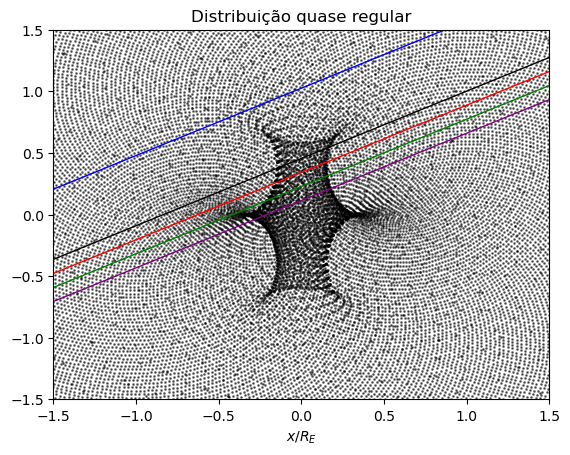

In [19]:
# abaixo, 'xa' e 'ya' sao as posicoes cartesianas dos fótons dados pela distribuicao quase regular pelas espirais de arquimedes

plt.title('Distribuição quase regular')               # plots da distribuicao dos fótons
plt.xlabel(r'$x/R_{E}$')
plt.scatter(x_arq, y_arq, s = 1, color='k', alpha=0.5)      # s é o tamanho dos pontos, alpha é a transparência

for i, mu, color in zip(range(tam), mus, colors):
    points(i, mu, color)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.show()

agora podemos plotar as magnitudes para cada um dos caminhos acima

In [20]:
def curves(mu, color):

    res = 100
    delt = 0.08
    alpha = 0.5
    
    b = mu/math.cos(alpha)

    xp = np.linspace(-1.5, 1.5, res)                  # posicoes 'xp' e 'yp' dos pontos para uma das curvas
    yp = np.tan(alpha)*xp + b

    mag = np.zeros(res)  # Inicializa a array mag com zeros
    t = range(res)
    
    for i in range(res):
        for xi, yi in zip(x_arq, y_arq):
            if (xp[i]-delt <= xi and xi <= xp[i]+delt and yp[i]-delt <= yi and yi <= yp[i]+delt):
                mag[i] += 1
                
    plt.plot(t, mag, c=color, lw = 1, alpha=0.6)
    return mag

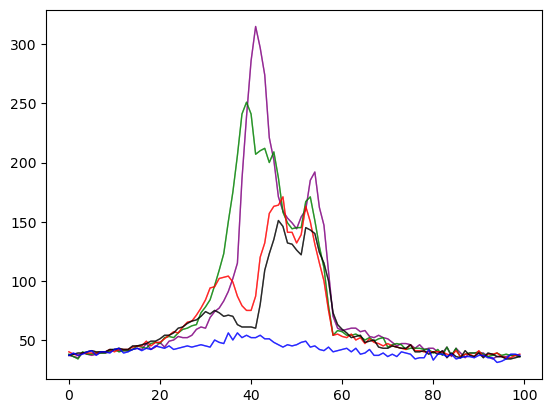

In [21]:
mags_list = []

for i in range(tam):
    mags_list.append(curves(mus[i], colors[i]))
    curves(mus[i], colors[i])

plt.show()

limpando os dados

In [14]:
type(mags_list)

list

In [15]:
def somat(data, r, i):
    soma = 0
    if i <= r:
        for m in range(-i, r+1):
            soma += data[i+m]
    elif i >= len(data)-r:
        for m in range(-r, len(data)-i):
            soma += data[i+m]
    else:
        for m in range(-r, r+1):
            soma += data[i+m]
    return soma

In [16]:
new_mags = [[0] * res for _ in range(tam)]

r = 1

for i, lst in enumerate(mags_list):
    for j, value in enumerate(lst):
        new_mags[i][j] = (1/(2*r))*somat(lst, r, j)

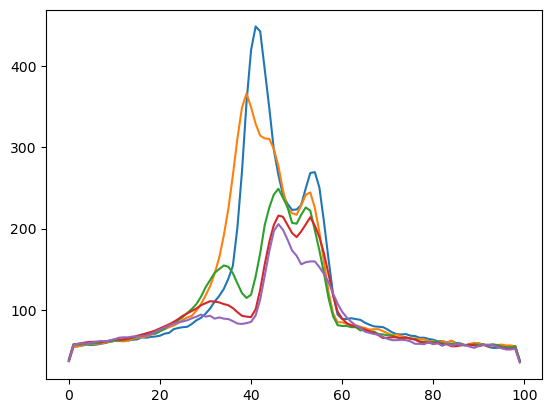

In [17]:
t = range(res)

for lst in new_mags:
    plt.plot(t, lst)